# <div style="text-align: center"> Advanced Machine Learning

## <div style="text-align: center">Advanced Python data wrangling for business projects (II)
    
    Patryk Siczek


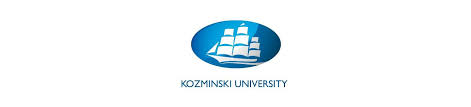
![logo2](https://efs.mrpips.gov.pl/__data/assets/image/0014/11336/04_zestawienie_power_rp_ue_efs.png)

---

In [1]:
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm

from itertools import product

<div class="alert alert-block alert-success">
⚠️GENERAL DESCRIPTION
<br>

Let's assume a business manager approaches you and asks you to create a database for style quiz, based on the file `style_quiz_matrix_base.xlsx`.
    
It has to be created in such way so that the client can choose from 1 to 5 style quiz pictures and the system must select the most appropriate style for the client.
    
Your algorithm should calculate the final style that should be selected for the user. This style name should on the `right` column in df. The pictures that are not main (isMain = False) should have the value 1, the main pictures (isMain = True) should have the value 3.
    
If we have draws/ties then the style with the smallest number should win (so eg., style_0 and style_4 have each both 2 points - in that case style_0 should be chosen by the algorithm.
    
Create a final style_quiz_matrix that would be similar to the `style_quiz_matrix.xlsx` file.

</div>

In [2]:
BOARDING_RULES_ROW = 2
FIRST_COL_ROW_WITH_DESCR_FIN = 3
STYLE_VERDICT_START_COL = 16

<div class="alert alert-block alert-success">
⚠️TASK 1
<br>

Load `style_quiz_matrix_base.xlsx` to a variable `df`. Then fill out all rows with a product of all style answers (so there should be all possible style questions' combinations present in your final `df`).
<br><br>
Use the display of the final `df` dataframe below for reference.

</div>

In [3]:
df = pd.read_excel('style_quiz_matrix_base.xlsx')

In [4]:
df

,Unnamed: 0,left,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,right
0,style_ID,style_0,style_0,style_0,style_1,style_1,style_1,style_2,style_2,style_2,style_3,style_3,style_3,style_4,style_4,style_4,NaN
1,isMain,false,false,true,false,false,true,false,false,true,false,false,true,false,false,true,style_name
2,NaN,"Yes, No","Yes, No","Yes, No","Yes, No","Yes, No","Yes, No","Yes, No","Yes, No","Yes, No","Yes, No","Yes, No","Yes, No","Yes, No","Yes, No","Yes, No",NaN


In [5]:
df.iloc[2,1]

'Yes, No'

In [6]:
len(df.iloc[2,1])

7

In [7]:
for col in df.columns[1:-1]:
    df.loc[2, col] = df.loc[2, col].split(', ')

In [8]:
df

,Unnamed: 0,left,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,right
0,style_ID,style_0,style_0,style_0,style_1,style_1,style_1,style_2,style_2,style_2,style_3,style_3,style_3,style_4,style_4,style_4,NaN
1,isMain,false,false,true,false,false,true,false,false,true,false,false,true,false,false,true,style_name
2,NaN,"[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]",NaN


In [9]:
df.iloc[2,1]

['Yes', 'No']

In [10]:
len(df.iloc[2,1])

2

In [11]:
output = list(product(*[df.loc[2, col] for col in df.columns[1:-1]]))

In [12]:
#output = list(product(*[df.loc[2, col] for col in df.columns[1:16]]))

In [13]:
output

[('Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes'),
 ('Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'No'),
 ('Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'No',
  'Yes'),
 ('Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'No',
  'No'),
 ('Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'No',
  'Yes',
  'Yes'),
 ('Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'No',
  'Yes',
  'No'),
 ('Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'No',
  'No',
  'Yes'),
 ('Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  '

In [14]:
pd.DataFrame(output, columns=df.columns[1:-1])

,left,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
3,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No
4,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32763,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No
32764,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes
32765,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
32766,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes


In [15]:
output_final = pd.DataFrame(output, columns=df.columns[1:-1])

df = pd.concat([df,output_final], ignore_index=True)

In [16]:
df

,Unnamed: 0,left,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,right
0,style_ID,style_0,style_0,style_0,style_1,style_1,style_1,style_2,style_2,style_2,style_3,style_3,style_3,style_4,style_4,style_4,NaN
1,isMain,false,false,true,false,false,true,false,false,true,false,false,true,false,false,true,style_name
2,NaN,"[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]",NaN
3,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN
4,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32766,NaN,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,NaN
32767,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,NaN
32768,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,NaN
32769,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NaN


<div class="alert alert-block alert-success">
⚠️TASK 2
<br>

Remove combinations with more than 5 pictures chosen, and with 0 pictures chosen.
<br><br>
Use the display of the final `df` dataframe below for reference.

</div>

In [17]:
df = df[df.eq('Yes').sum(axis=1) <= 5].reset_index(drop=True)

In [18]:
# removing combinations with more than 5 pics chosen
df

,Unnamed: 0,left,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,right
0,style_ID,style_0,style_0,style_0,style_1,style_1,style_1,style_2,style_2,style_2,style_3,style_3,style_3,style_4,style_4,style_4,NaN
1,isMain,false,false,true,false,false,true,false,false,true,false,false,true,false,false,true,style_name
2,NaN,"[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]",NaN
3,NaN,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,NaN
4,NaN,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,NaN,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,NaN
4943,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,NaN
4944,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,NaN
4945,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NaN


In [19]:
df = df[df.eq('No').sum(axis=1) < 15].reset_index(drop=True)

In [20]:
df

,Unnamed: 0,left,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,right
0,style_ID,style_0,style_0,style_0,style_1,style_1,style_1,style_2,style_2,style_2,style_3,style_3,style_3,style_4,style_4,style_4,NaN
1,isMain,false,false,true,false,false,true,false,false,true,false,false,true,false,false,true,style_name
2,NaN,"[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]",NaN
3,NaN,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,NaN
4,NaN,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,NaN,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,NaN
4942,NaN,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,NaN
4943,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,NaN
4944,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,NaN


In [21]:
print(df_filtered)

NameError: name 'df_filtered' is not defined

<div class="alert alert-block alert-success">
⚠️TASK 3
<br>

Populate the Scene id column.
<br><br>
Use the display of the final `df` dataframe below for reference.

</div>

In [ ]:
# populating Scene id column


In [25]:
# Iterate over the rows of the DataFrame
for i, row in df.iterrows():
    # Assign a Scene id based on the row index
    df.loc[i, 'Scene id'] = f'scene_{i+1}'

In [31]:
df['Scene id'] = df.index + 1

In [32]:
df

,Unnamed: 0,left,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,right,Scene id
0,style_ID,style_0,style_0,style_0,style_1,style_1,style_1,style_2,style_2,style_2,style_3,style_3,style_3,style_4,style_4,style_4,NaN,1
1,isMain,false,false,true,false,false,true,false,false,true,false,false,true,false,false,true,style_name,2
2,NaN,"[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]",NaN,3
3,NaN,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,NaN,4
4,NaN,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,No,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,NaN,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,NaN,4942
4942,NaN,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,NaN,4943
4943,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,NaN,4944
4944,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,NaN,4945


<div class="alert alert-block alert-success">
⚠️TASK 4
<br>

Calculate the winning style for each line, according to the following scoring:
- 1 point for each `Yes`, if the `isMain` row is `false`
- 3 points for each `Yes`, if the `isMain` row is `true`
- 0 points for each `No`
    
Calculate the scoring for each row and assign the correct "winning" style in the `right` column.
    
<br><br>
Use the display of the final `df` dataframe below for reference.

</div>

In [ ]:
# calculating the winning style for each line



In [37]:
def calculate_score(row, style):
    score = 0
    for col in df.columns[1:-2]:
        if row[col] == 'Yes':
            if row['isMain']:
                score += 3
            else:
                score += 1
        if style == row['style_1']:
            score += 1
        elif style == row['style_2']:
            score += 2
        elif style == row['style_3']:
            score += 3
        elif style == row['style_4']:
            score += 4
        elif style == row['style_5']:
            score += 5
    return score


In [41]:
df

,Unnamed: 0,left,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,right,Scene id
0,style_ID,style_0,style_0,style_0,style_1,style_1,style_1,style_2,style_2,style_2,style_3,style_3,style_3,style_4,style_4,style_4,NaN,1
1,isMain,false,false,true,false,false,true,false,false,true,false,false,true,false,false,true,style_name,2
2,NaN,"[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]",NaN,3
3,NaN,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,NaN,4
4,NaN,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,No,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,NaN,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,NaN,4942
4942,NaN,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,NaN,4943
4943,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,NaN,4944
4944,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,NaN,4945


In [48]:
# Define a function to calculate the score for each style in a row
def calculate_score(row, style):
    score = 0
    for col in row.index:
        if row[col] == 'Yes':
            if 'isMain' in col and row['isMain'] == 'true':
                score += 3
            elif 'isMain' not in col or row['isMain'] == 'false':
                score += 1
        elif row[col] == 'No':
            score += 0
    return score

# Loop through each row to calculate the score for each style
for index, row in df.iterrows():
    if index == 0:
        # Skip the first row since it only contains style names
        continue
    scores = {}
    for style in ['style_0', 'style_1', 'style_2', 'style_3', 'style_4', 'style_5']:
        scores[style] = calculate_score(row, style)
    max_score = max(scores.values())
    winning_styles = [style for style, score in scores.items() if score == max_score]
    df.loc[index, 'winning_style'] = sorted(winning_styles)[0]

In [49]:
df

,Unnamed: 0,left,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,right,Scene id,winning_style
0,style_ID,style_0,style_0,style_0,style_1,style_1,style_1,style_2,style_2,style_2,style_3,style_3,style_3,style_4,style_4,style_4,NaN,1,NaN
1,isMain,false,false,true,false,false,true,false,false,true,false,false,true,false,false,true,style_name,2,style_0
2,NaN,"[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]","[Yes, No]",NaN,3,style_0
3,NaN,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,NaN,4,style_0
4,NaN,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,No,NaN,5,style_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,NaN,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,NaN,4942,style_0
4942,NaN,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,NaN,4943,style_0
4943,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,NaN,4944,style_0
4944,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,NaN,4945,style_0


---

In [50]:
df.to_excel('style_quiz_matrix_final.xlsx')